Week 5 · Day 3 — PyTorch Basics (Tensors & Autograd)
Why this matters

PyTorch is the standard deep learning framework. It gives you:

Tensors (like NumPy arrays, but GPU-ready).

Autograd (automatic gradients, no more hand-written backprop).

Modules (layers, optimizers, losses).

Theory Essentials

torch.tensor = multi-dimensional array (like np.array).

Tensors can live on CPU or GPU.

Operations build a computational graph.

.backward() computes gradients via backprop automatically.

.grad stores gradients for parameters.

Exactly ✅ — you’ve nailed the intuition.

* The **gradient** tells you how the **Binary Cross-Entropy (BCE) loss** will change if you adjust each weight.
* If the gradient is positive → increasing that weight makes BCE go up → so you should **decrease** it.
* If the gradient is negative → increasing that weight makes BCE go down → so you should **increase** it.

That’s why the update rule is always:

$$
w \leftarrow w - \eta \cdot \text{grad}
$$

→ step in the *opposite* direction of the gradient, so the loss shrinks.

---

👉 In short: gradients are your **GPS arrows**. They don’t directly reduce the loss — they tell your optimizer **which way to push the weights** so the BCE keeps going down.



In [1]:
# Setup
import torch

# 1. Tensors
x = torch.tensor([[1.,2.],[3.,4.]], requires_grad=True)
y = torch.tensor([[2.],[1.]], requires_grad=True)

# 2. Matrix multiplication
z = x @ y    # shape (2,1)
print("z:", z)

# 3. Autograd in action
loss = z.sum()     # scalar
loss.backward()    # compute gradients

print("Gradient of x:\n", x.grad)
print("Gradient of y:\n", y.grad)

# 4. GPU usage (if available)
if torch.cuda.is_available():
    x_gpu = x.to("cuda")
    print("Tensor on GPU:", x_gpu)


z: tensor([[ 4.],
        [10.]], grad_fn=<MmBackward0>)
Gradient of x:
 tensor([[2., 1.],
        [2., 1.]])
Gradient of y:
 tensor([[4.],
        [6.]])


Good question — let’s zoom in on **what a PyTorch tensor really is** and then tie it back to your code.

---

### 1. What is a tensor?

* A **tensor** is just a general name for a container of numbers.
* Scalars (single numbers), vectors (1D), matrices (2D) are all tensors of different ranks.
* PyTorch tensors are like **NumPy arrays**, but with extra superpowers:

  * They can run on a GPU.
  * They can track operations for **autograd** (automatic differentiation).

---

### 2. In your code

```python
x = torch.tensor([[1.,2.],[3.,4.]], requires_grad=True)
y = torch.tensor([[2.],[1.]], requires_grad=True)
```

* `x`:

  * Shape = `(2,2)` → 2 rows, 2 columns.
  * Looks like a small 2×2 matrix:

    $$
    x = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
    $$
  * `requires_grad=True` means PyTorch will keep a record of everything you do with `x` so it can later compute derivatives.

* `y`:

  * Shape = `(2,1)` → 2 rows, 1 column.
  * Looks like a column vector:

    $$
    y = \begin{bmatrix} 2 \\ 1 \end{bmatrix}
    $$
  * Also set to track gradients.

---

### 3. What happens when you compute

```python
z = x @ y
```

* This is matrix multiplication: `(2,2) @ (2,1) → (2,1)`
* Result:

  $$
  z = \begin{bmatrix} 1*2 + 2*1 \\ 3*2 + 4*1 \end{bmatrix} 
    = \begin{bmatrix} 4 \\ 10 \end{bmatrix}
  $$

So `z` is also a **tensor** (shape `(2,1)`).

---

### 4. Autograd example

#### Step 1. What is `z`?

From your code:

```python
z = x @ y
```

* `x = [[1,2],[3,4]]` (2×2)
* `y = [[2],[1]]` (2×1)
* So:

$$
z = \begin{bmatrix} 1*2 + 2*1 \\ 3*2 + 4*1 \end{bmatrix} 
  = \begin{bmatrix} 4 \\ 10 \end{bmatrix}
$$

* Shape = (2,1).

---

#### Step 2. Why `loss = z.sum()`?

PyTorch needs a **single scalar** to start backpropagation.

* `z` has 2 numbers: `[4, 10]`.
* `z.sum()` just adds them → `loss = 14`.
* Now we have one scalar, perfect for `.backward()`.

So:

```python
loss = z.sum()   # scalar = 14
```

---

#### Step 3. What does `loss.backward()` do?

* PyTorch built a **computation graph**:
  `x, y → (matrix multiply) → z → (sum) → loss`.
* When you call `.backward()`, PyTorch walks this graph backwards (chain rule).
* It computes:

  * How does `loss` change if I change each entry of `x`?
  * How does `loss` change if I change each entry of `y`?
* The answers go into `x.grad` and `y.grad`.

---

#### Step 4. What are the gradients here?

* `x.grad`:

  $$
  \frac{\partial loss}{\partial x} = y^T
  $$

  So each row of `x` gets the vector `[2,1]`.
* `y.grad`:

  $$
  \frac{\partial loss}{\partial y} = x^T \cdot [1,1]^T
  $$

  Which comes out to `[4+10] = [[4],[6]]`.

PyTorch prints these automatically when you check `.grad`.




### 1. Why are the gradients matrices?

* Because your original `x` is a **2×2 tensor**.
* That means the loss depends on each of those 4 numbers.
* So `x.grad` is also **2×2**, with one gradient for each entry.

Similarly:

* `y` was 2×1 → so `y.grad` is 2×1.

👉 Every element in your tensor gets its **own derivative**, because each can affect the loss.

---

### 2. What do the values mean?

Take `x.grad` for example:

```text
tensor([[2., 1.],
        [2., 1.]])
```

* The entry at `[0,0]` (2.0) means: *“if you nudge x\[0,0] by +0.01, the loss goes up by about 0.02.”*
* The entry at `[0,1]` (1.0) means: *“if you nudge x\[0,1] by +0.01, the loss goes up by about 0.01.”*
* And so on for each entry.

Same logic for `y.grad`.

---

### 3. Why the dots after the numbers?

Like: `2.` or `1.` instead of `2` or `1`.

* That’s just PyTorch showing you they are **floating point numbers** (`float32` or `float64`).
* So `2.` means `2.0`.
* It’s not extra math, just formatting.

---

### 4. Big picture

* `x.grad` = a sensitivity map: how each element of `x` influences the loss.
* `y.grad` = same, but for `y`.
* These are exactly what an optimizer would use to update parameters during training.



Is bigger gradient always better?

❌ No.

If the gradient is too big → weight updates can jump around wildly (loss “bounces” or diverges).

If the gradient is too small → learning is super slow (the network barely changes).

✅ What you want is a balance:

Gradients big enough to make progress.

Not so big that updates overshoot.

That’s why we use the learning rate (η): it scales the gradients to the right step size.

1) Core (10–15 min)
Task: Create a tensor w = torch.randn(3, requires_grad=True) and compute f = (w**2).sum(). Call .backward() and check gradients.

In [4]:
w = torch.randn(3, requires_grad=True)
f = (w**2).sum()
f.backward()
print("w:", w)
print("w.grad (should be 2w):", w.grad)


w: tensor([ 0.0522,  2.2027, -0.1709], requires_grad=True)
w.grad (should be 2w): tensor([ 0.1044,  4.4054, -0.3418])


2) Practice (10–15 min)
Task: Create a tiny linear model manually: y = X @ w + b. Use autograd to compute gradients of MSE loss.

In [5]:
X = torch.randn(5,3)
y_true = torch.randn(5,1)

w = torch.randn(3,1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

y_pred = X @ w + b
loss = ((y_pred - y_true)**2).mean()
loss.backward()

print("Grad w:", w.grad)
print("Grad b:", b.grad)


Grad w: tensor([[ 0.9868],
        [-1.3484],
        [ 3.2521]])
Grad b: tensor([-1.4563])


### Step by step

1. **Create data**

```python
X = torch.randn(5,3)      # 5 samples, each with 3 features
y_true = torch.randn(5,1) # 5 target values (what we want to predict)
```

So the task is: learn a mapping from 3 input features → 1 output.

---

2. **Create model parameters**

```python
w = torch.randn(3,1, requires_grad=True)  # weights
b = torch.randn(1, requires_grad=True)    # bias
```

* `w` is a (3×1) matrix: one weight for each feature.
* `b` is the bias (just shifts predictions up/down).

---

3. **Make predictions**

```python
y_pred = X @ w + b
```

* This is the formula for a **linear model**:

  $$
  \hat{y} = Xw + b
  $$
* Each row of `X` gets multiplied by weights `w` and shifted by `b`.

---

4. **Compute loss**

```python
loss = ((y_pred - y_true)**2).mean()
```

* This is **Mean Squared Error (MSE)**:

  $$
  L = \frac{1}{N} \sum (y_{pred} - y_{true})^2
  $$
* Measures how far predictions are from targets.

---

5. **Backpropagation**

```python
loss.backward()
```

* PyTorch automatically computes:

  * `w.grad = ∂L/∂w`
  * `b.grad = ∂L/∂b`

---

6. **Interpretation**

* `w.grad` tells you how to adjust each weight to reduce loss.
* `b.grad` tells you how to adjust the bias.
* In training, an optimizer (like SGD) would do:

  $$
  w \leftarrow w - \eta \cdot w.grad
  $$

  $$
  b \leftarrow b - \eta \cdot b.grad
  $$

---


3) Stretch (optional, 10–15 min)
Task: Move tensors to GPU (if available), perform matrix multiplication, and bring results back to CPU.

I dont have GPU to do this

Mini-Challenge (≤40 min)

Task: Implement linear regression with PyTorch autograd.
Acceptance Criteria:

Create synthetic data (y = 3x + 2 + noise).

Initialize w,b with requires_grad=True.

Do gradient descent manually: forward → loss → backward → update → zero grads.

Show loss decreasing over epochs.

Print final learned w,b vs true 3,2.

True  w,b = 3.0, 2.0
Learned w,b = 2.987, 2.014
Final loss = 0.08621


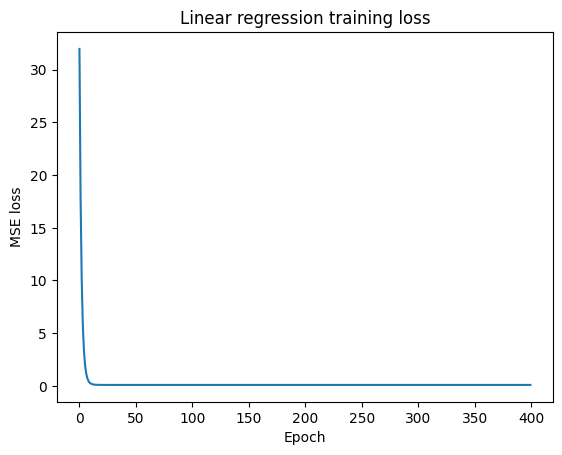

In [6]:
# Linear regression with PyTorch autograd (y = 3x + 2 + noise)

import torch, matplotlib.pyplot as plt
torch.manual_seed(42)

# 1) Synthetic data
N = 200
x = torch.linspace(-2, 2, N).unsqueeze(1)           # shape (N,1)
y_true = 3*x + 2 + 0.3*torch.randn_like(x)          # y = 3x + 2 + Gaussian noise

# 2) Parameters with gradients
w = torch.randn(1, 1, requires_grad=True)           # weight
b = torch.randn(1,     requires_grad=True)          # bias

# 3) Gradient descent loop: forward -> loss -> backward -> update -> zero grads
lr, epochs = 0.1, 400
loss_history = []

for epoch in range(epochs):
    y_pred = x @ w + b                               # forward
    loss = ((y_pred - y_true)**2).mean()             # MSE
    loss_history.append(loss.item())

    loss.backward()                                  # backprop

    with torch.no_grad():                            # manual parameter update
        w -= lr * w.grad
        b -= lr * b.grad

    w.grad.zero_()                                   # zero grads
    b.grad.zero_()

# 4) Report results
print(f"True  w,b = 3.0, 2.0")
print(f"Learned w,b = {w.item():.3f}, {b.item():.3f}")
print(f"Final loss = {loss_history[-1]:.5f}")

# 5) Show loss decreasing
plt.plot(loss_history)
plt.xlabel("Epoch"); plt.ylabel("MSE loss"); plt.title("Linear regression training loss")
plt.show()



### 1. What is `x = torch.linspace(-2, 2, N).unsqueeze(1)`?

* `torch.linspace(-2, 2, N)` → makes **N points evenly spaced between -2 and 2**.
  Example (N=5): `[-2, -1, 0, 1, 2]`.
* `.unsqueeze(1)` → changes shape from `(N,)` (a flat vector) to `(N,1)` (a column vector).

  * This is needed because in linear regression, each sample is usually stored as a **row** with features as columns.
  * Here we have just **1 feature**, so the shape is `(N,1)`.

👉 So `x` is our **input data**: 200 numbers from -2 to 2, arranged as a column.

---

### 2. What is `y_true = 3*x + 2 + noise`?

* Without noise: `y = 3x + 2` is a perfect straight line (slope 3, intercept 2).
* Adding `+ 0.3*torch.randn_like(x)` introduces **Gaussian noise** → small random bumps up and down.
* This makes the data look like a **cloud of points around the true line**.

👉 So `y_true` is the **target output** for each input `x`.

---

### 3. Why do we do this?

We want to **simulate real-world data**:

* In reality, data is never perfectly on a line.
* There’s always noise (measurement error, randomness, natural variability).
* Our job in linear regression is to learn the underlying line (`w=3, b=2`) from noisy samples.

---

### 4. How does training work here?

* The model starts with random guesses for `w` and `b`.
* It makes predictions `y_pred = x @ w + b`.
* It compares to `y_true`.
* The gradients tell how to adjust `w` and `b` to better fit the noisy points.
* Over many epochs, the model “pulls” its line closer to the true one.

---

👉 In plain words:

* `x` = a list of input numbers between -2 and 2.
* `y_true` = the real outputs, which follow the rule `y=3x+2` but with some random wiggle.
* Linear regression tries to rediscover that line by adjusting `w` and `b`.

---


### 1. Loss function (MSE)

For $N$ samples:

$$
L = \frac{1}{N}\sum_{i=1}^{N} (\hat{y}_i - y_i)^2
$$

where $\hat{y}_i = x_i w + b$.

---

### 2. Gradients we need

We want $\frac{\partial L}{\partial w}$ and $\frac{\partial L}{\partial b}$.
These tell us how to update slope and intercept.

---

### 3. Derivative wrt $w$

$$
\frac{\partial L}{\partial w} = \frac{2}{N}\sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot x_i
$$

* If predictions are too big, this is positive → reduce $w$.
* If predictions are too small, it’s negative → increase $w$.

---

### 4. Derivative wrt $b$

$$
\frac{\partial L}{\partial b} = \frac{2}{N}\sum_{i=1}^{N} (\hat{y}_i - y_i)
$$

* If predictions are overall too high, decrease $b$.
* If predictions are overall too low, increase $b$.

---

### 5. Gradient descent update

$$
w \leftarrow w - \eta \cdot \frac{\partial L}{\partial w}, 
\quad b \leftarrow b - \eta \cdot \frac{\partial L}{\partial b}
$$

with learning rate $\eta$.

---

👉 In practice, you don’t calculate these by hand — **PyTorch does it for you with `.backward()`**.
But it’s good to know: yes, the gradients come from differentiating MSE.